In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
mpl.style.use('classic')

import baraffe_tables
from baraffe_tables.table_search import baraffe_table_search

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil

%matplotlib inline

In [2]:
mJtomSun = u.jupiterMass.to(u.solMass)
mJtoGrams = u.jupiterMass.to(u.g)

rJtorSun = u.jupiterRad.to(u.solRad)
rJtoCm = u.jupiterRad.to(u.cm)

print(mJtomSun)
print(mJtoGrams)
print(rJtorSun)
print(rJtoCm)


0.0009545942339693249
1.8981245973360504e+30
0.10276268506540176
7149200000.0


In [3]:
print(5*rJtoCm)

35746000000.0


In [4]:
#jupiter masses. note that the last 2 in this list (0.25, 0.2 Mj) weren't created successfully, so don't try to relax them
Minit = np.round(np.logspace(np.log10(0.2),np.log10(20.), num=20),2)[::-1]
#jupiter radii
Rinit = np.array((10.0,7.5,5.0,3.0,2.5,2.0,1.75,1.5,1.25,1.0))

# for now: abbreviated list to see if the relax_composition step affects the entropy
#Minit = np.array((20.0, 9.67, 4.67, 1.09))
#Rinit = np.array((5.0, 2.5, 1.0))


#overall metallicities
Zinit = np.array((0.01,0.025,0.05,0.1))

#specific entropies
Sinit = np.array((8.0,9.0,10.0,11.0))

# composition profiles
comps = ['uniform','linear','exponential','gaussian','core_uniform','core_linear','core_exponential','core_gaussian','inert_core']

In [103]:
Minit = np.atleast_1d(np.array((7.59)))
Rinit = np.atleast_1d(np.array((2.0)))
Zinit = np.atleast_1d(np.array((0.1)))
Sinit = np.atleast_1d(np.array((11.0)))
comps = ['uniform','linear','exponential','gaussian','inert_core']
alphas = np.atleast_1d((np.array((1.5))))


In [104]:
pwd

'/Users/emily/Documents/astro/giant_planets/science_runs/3_evolved_models'

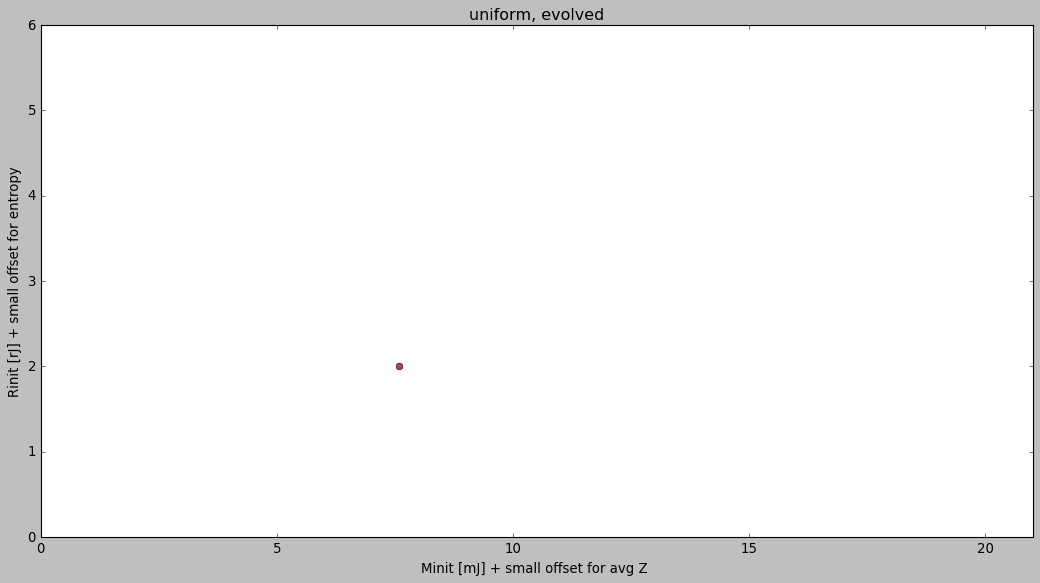

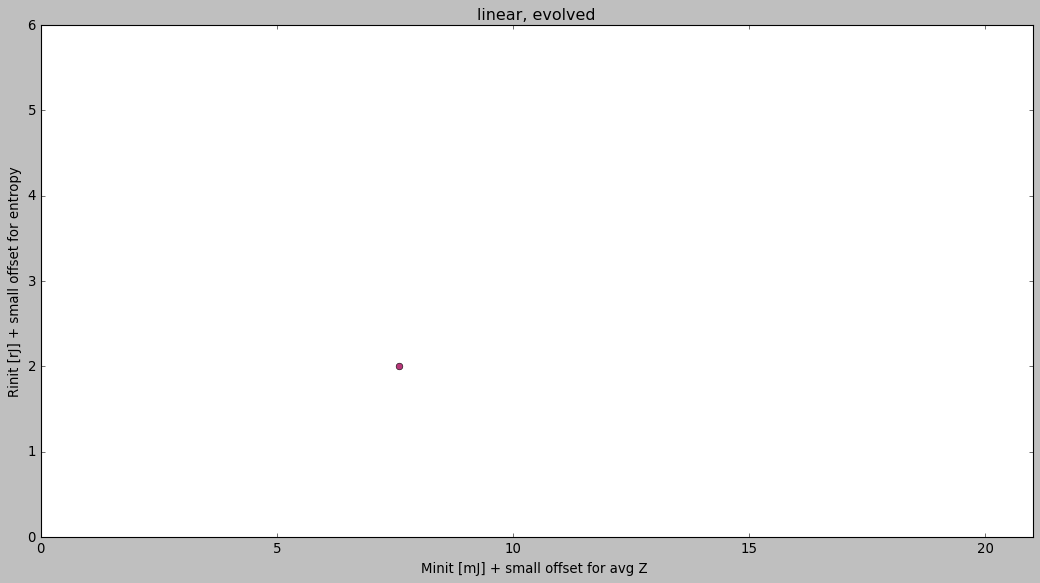

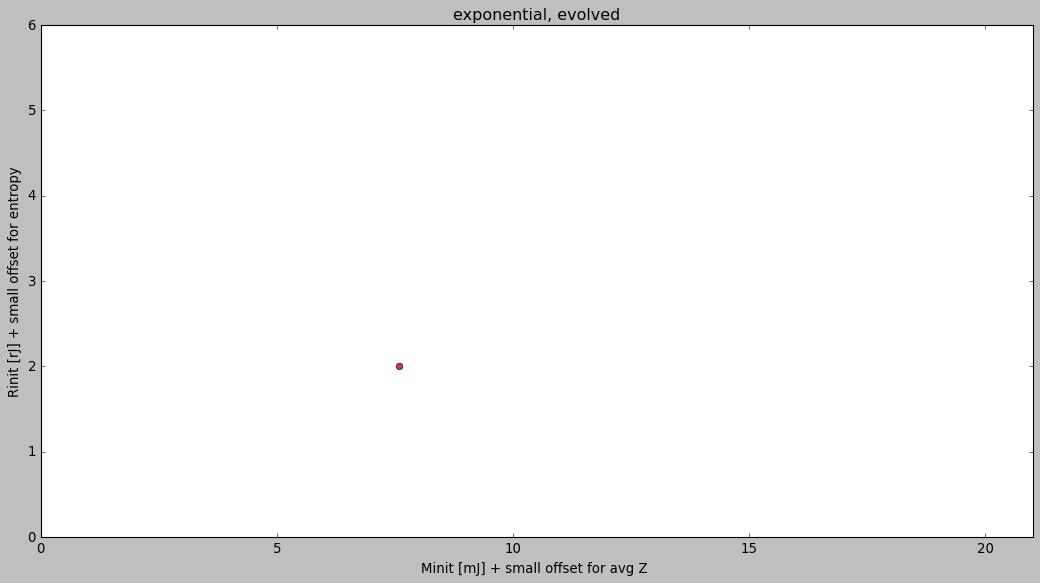

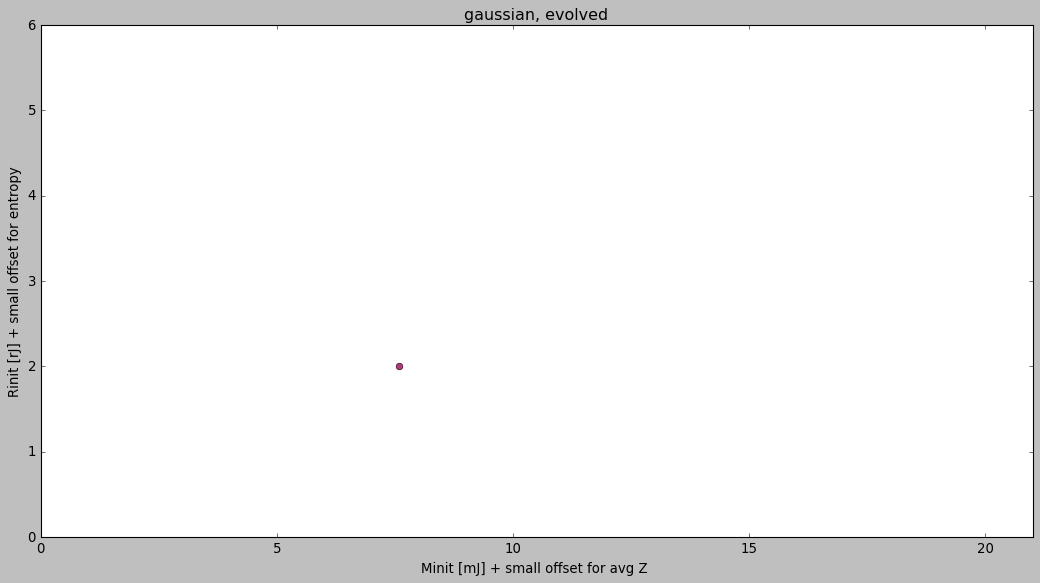

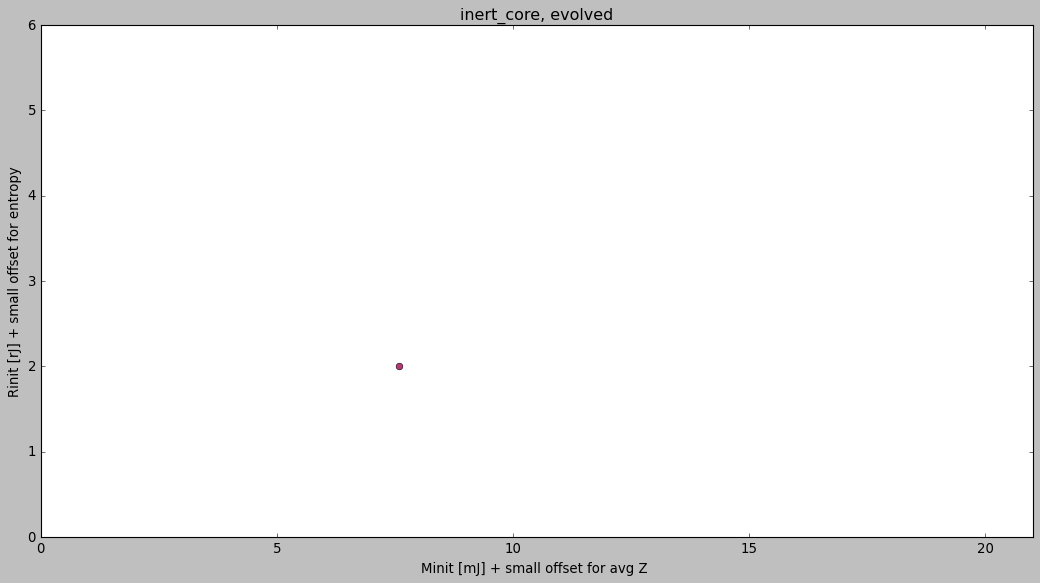

In [105]:
os.chdir('/Users/emily/Documents/astro/giant_planets/science_runs/3_evolved_models')

create_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/1_created_models'
relax_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/2_relaxed_models'
evolve_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/3_evolved_models'

markers = ['o','s','v','^']

cm = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=np.log(np.min(Zinit))-0.25, vmax=np.log(np.max(Zinit))+0.25)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

for l, comp in enumerate(comps):
    fig, ax = plt.subplots(1,1,figsize=(16,8))
    for i, m in enumerate(Minit):
        for j, r in enumerate(Rinit):
            for k, z in enumerate(Zinit):
                for n, s in enumerate(Sinit):
                    colorVal = scalarMap.to_rgba(np.log(z))
                    evolveSuccess = False
                    this_comp_dir = "{0}_evolved".format(comp)
                        
                    for a, alpha in enumerate(alphas):
                        evolve_model_filename = "{0}/{1}/planet_evolve_{2}_Mj_{3}_Rj_zbar={4}_{5}_s={6}_alpha={7}.mod".format(evolve_models_dir, this_comp_dir, m, r, z, comp, s, alpha)

                        if os.path.isfile(evolve_model_filename):
                            evolveSuccess = True
                    if evolveSuccess is True:
                        ax.plot(m+(0.1*k), r+(0.1*n), marker=markers[n],color=colorVal)
                    else:
                        ax.plot(m+(0.1*k), r+(0.1*n), marker='x', color='k')
                        
    ax.set_title("{0}, evolved".format(comp))
    ax.set_xlim(0,21)
    ax.set_ylim(0,6)
    ax.set_xlabel("Minit [mJ] + small offset for avg Z ")
    ax.set_ylabel("Rinit [rJ] + small offset for entropy")
    
    plt.show()
                    

In [131]:
# plot initial composition gradients

os.chdir('/Users/emily/Documents/astro/giant_planets/science_runs/3_evolved_models')

create_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/1_created_models'
relax_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/2_relaxed_models'
evolve_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/3_evolved_models'

markers = ['o','s','v','^']

cm = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=np.log(np.min(Zinit))-0.25, vmax=np.log(np.max(Zinit))+0.25)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

fig, ax = plt.subplots(1,1,figsize=(8,8))
for l, comp in enumerate(comps[:-1]): # do inert core model separately
    print(comp)
    for i, m in enumerate(Minit):
        for j, r in enumerate(Rinit):
            for k, z in enumerate(Zinit):
                for n, s in enumerate(Sinit):
                    for a, alpha in enumerate(alphas):
                        colorVal = scalarMap.to_rgba(np.log(z))
    
                        this_comp_dir = "{0}_evolved".format(comp)

                        create_profile = "{0}/planet_create_{1}_Mj_{2}_Rj.profile".format(create_models_dir, m, r)
                        profile = Table.read(create_profile, format="ascii", header_start=4, data_start=5)

                        comp_file = "{0}/{1}_relaxed/composition_{2}_Mj_{3}_Rj_zbar={4}_{5}_s={6}.dat".format(relax_models_dir, comp, m, r, z, comp, s)
                        #print(comp_file)
                        #evolve_model_filename = "{0}/{1}/planet_evolve_{2}_Mj_{3}_Rj_zbar={4}_{5}_s={6}_alpha={7}.mod".format(evolve_models_dir, this_comp_dir, m, r, z, comp, s, alpha)

                        comp_data = np.genfromtxt(comp_file,skip_header=1)
                        print(np.shape(comp_data))
                        
                        Xarr = np.sum(comp_data[:,1:3], axis=1)
                        Yarr = np.sum(comp_data[:,3:5], axis=1)
                        Zarr = np.sum(comp_data[:,5:], axis=1)
                        
                        ax.plot(profile['q'], Zarr, linestyle='-', lw=2, label="{0} gradient".format(comp))
                        #ax.plot(profile['q'], np.sum(comp[:,1:], axis=1), linestyle=':')

# inert core model:
# nvm this is so far outside the range of the existing plot that it looks bad
qcore = np.array((0.,0.1,0.10000,1.0))
zcore = np.array((1.,1.,0.017,0.017))
ax.plot(qcore, zcore, linestyle='-', lw=2, label = "inert core")

ax.set_xlabel(r"$M/M_{\mathrm{planet}}$",fontsize=40)
ax.set_ylabel(r"$Z$",fontsize=40)
ax.set_ylim(0.,1.01)
ax.legend(loc='upper right',frameon=False, prop={'size': 21})
ax.tick_params(axis='both', which='major', labelsize=25)
#plt.show()
plt.savefig("../prelim_Zplot_{1}_Mj_{2}_Rj_zbar={2}_s={3}.pdf".format(m,r,z,s),bbox_inches="tight")
                    

uniform
(497, 13)
linear
(497, 13)
exponential
(497, 13)
gaussian
(497, 13)


In [132]:
# plot cooling curves
# plot initial composition gradients

os.chdir('/Users/emily/Documents/astro/giant_planets/science_runs/3_evolved_models')

create_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/1_created_models'
relax_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/2_relaxed_models'
evolve_models_dir = '/Users/emily/Documents/astro/giant_planets/science_runs/3_evolved_models'

markers = ['o','s','v','^']

cm = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=np.log(np.min(Zinit))-0.25, vmax=np.log(np.max(Zinit))+0.25)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

fig, ax = plt.subplots(1,1,figsize=(8,8))
for l, comp in enumerate(comps[:-1]): # do inert core model separately
    print(comp)
    for i, m in enumerate(Minit):
        for j, r in enumerate(Rinit):
            for k, z in enumerate(Zinit):
                for n, s in enumerate(Sinit):
                    for a, alpha in enumerate(alphas):
                        colorVal = scalarMap.to_rgba(np.log(z))
    
                        this_comp_dir = "{0}_evolved".format(comp)

                        #evolve_model_filename = "{0}/{1}/planet_evolve_{2}_Mj_{3}_Rj_zbar={4}_{5}_s={6}_alpha={7}.mod".format(evolve_models_dir, this_comp_dir, m, r, z, comp, s, alpha)
                        history_filename =  "{0}/{1}/planet_evolve_{2}_Mj_{3}_Rj_zbar={4}_{5}_s={6}_alpha={7}.history".format(evolve_models_dir, this_comp_dir, m, r, z, comp, s, alpha)
                        
                        history = Table.read(history_filename, format="ascii", header_start=4, data_start=5)
                        #print(history.colnames)
                        ax.plot(history['star_age'],history['luminosity'],linestyle='-',lw=2,label="{0} gradient".format(comp))

# inert core model:
history_filename =  "{0}/{1}/planet_evolve_{2}_Mj_{3}_Rj_zbar={4}_{5}_s={6}_alpha={7}.history".format(evolve_models_dir, "inert_core_evolved", m, r, z, "inert_core", s, alpha)
history = Table.read(history_filename, format="ascii", header_start=4, data_start=5)
ax.plot(history['star_age'],history['luminosity'],linestyle='-',lw=2,label="inert_core")

ax.set_xlabel(r"$\mathrm{age}\ \mathrm{[yr]}$",fontsize=40)
ax.set_ylabel(r"$L/L_{\odot}$",fontsize=40)
ax.set_xlim(3.e5,1.e10)
#ax.set_ylim(3.e-9,4.e-4)
#ax.set_xlim(3.e5,3.e7)
#ax.set_ylim(1.e-5,4.e-4)
ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_ylim(0.0148,0.037)
ax.legend(loc='lower left',frameon=False, prop={'size': 21})
ax.tick_params(axis='both', which='major', labelsize=25)
#plt.show()
plt.savefig("../prelim_Lplot_{1}_Mj_{2}_Rj_zbar={2}_s={3}.pdf".format(m,r,z,s),bbox_inches="tight")
                   

uniform
linear
exponential
gaussian


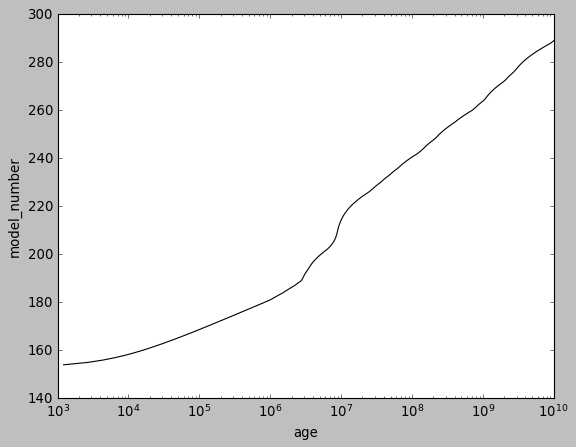

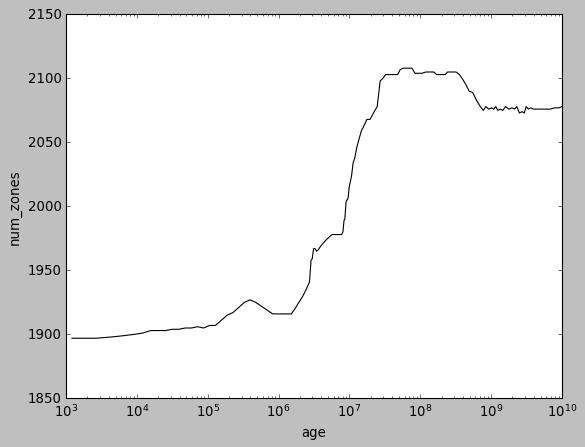

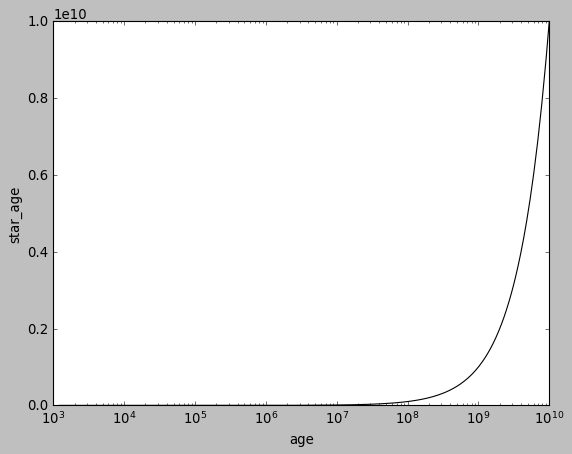

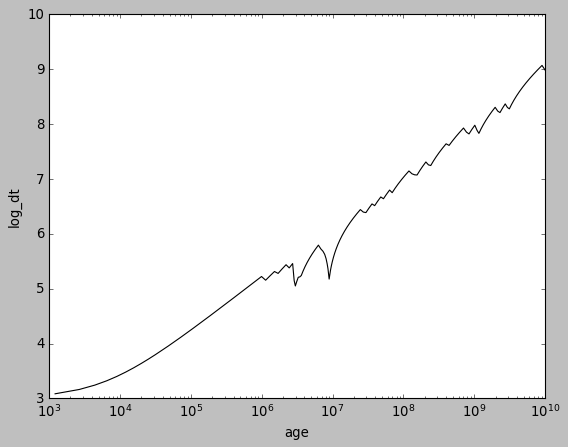

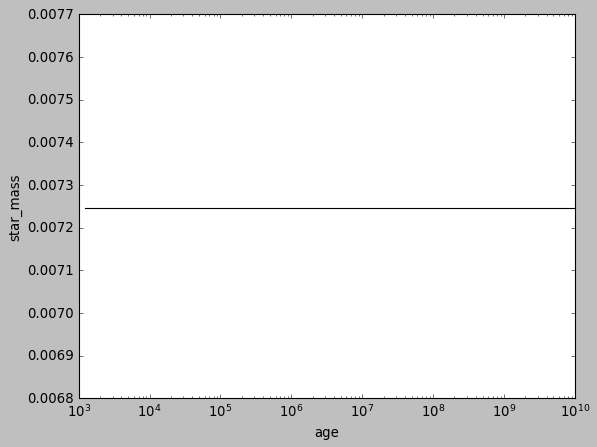

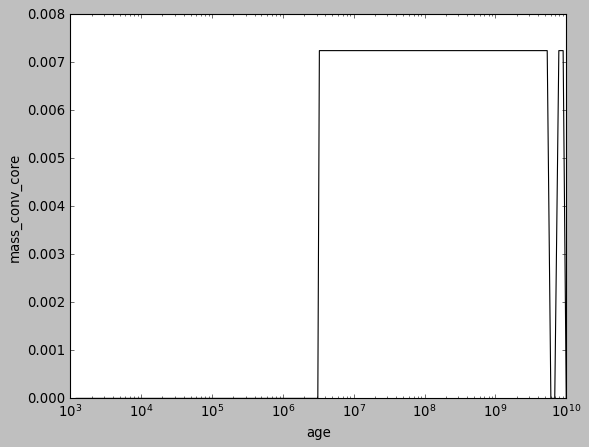

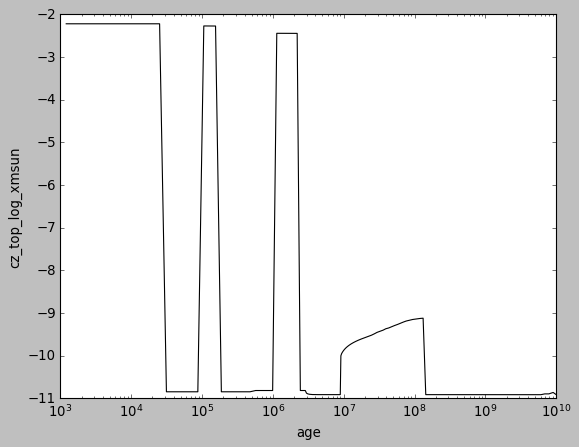

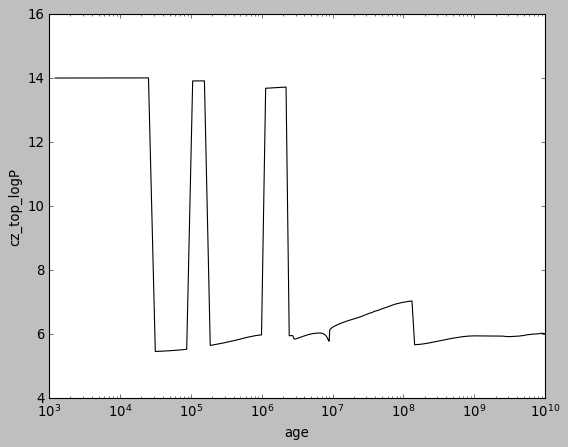

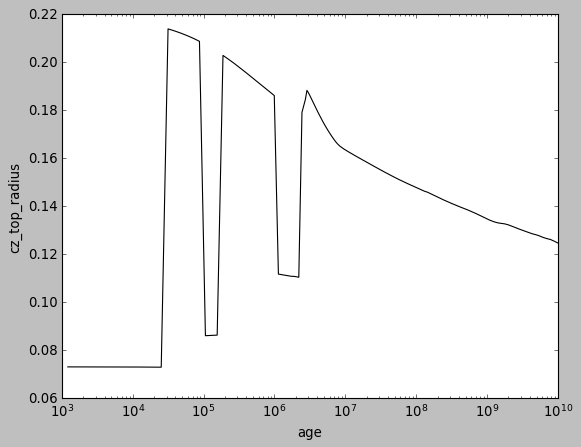

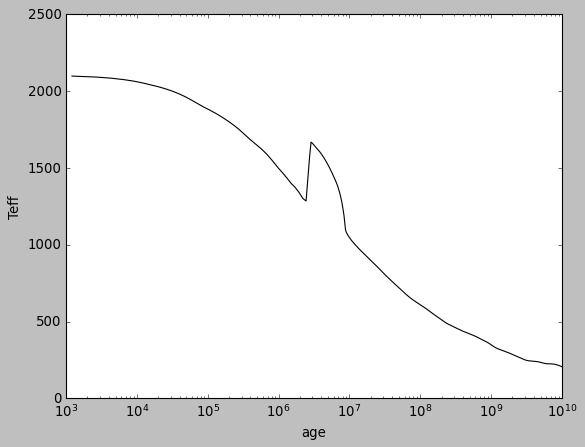

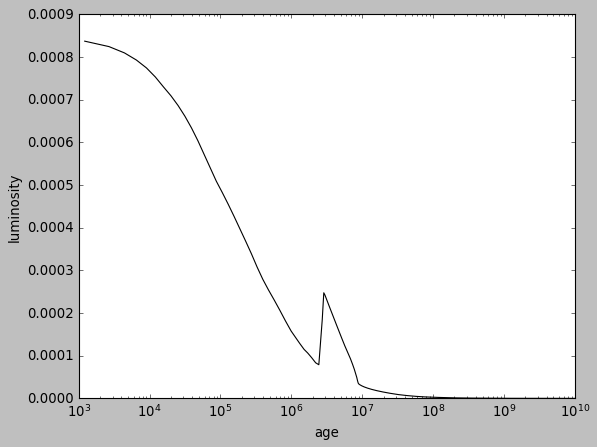

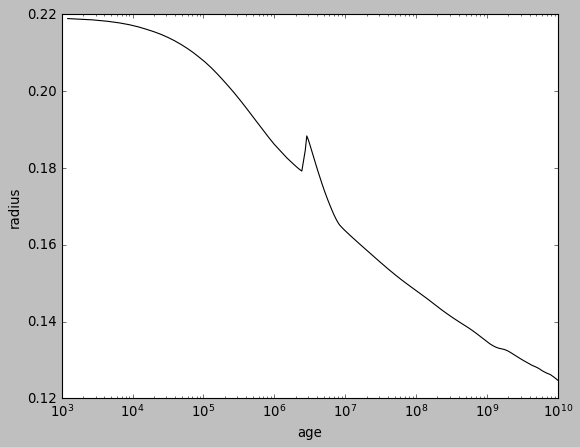

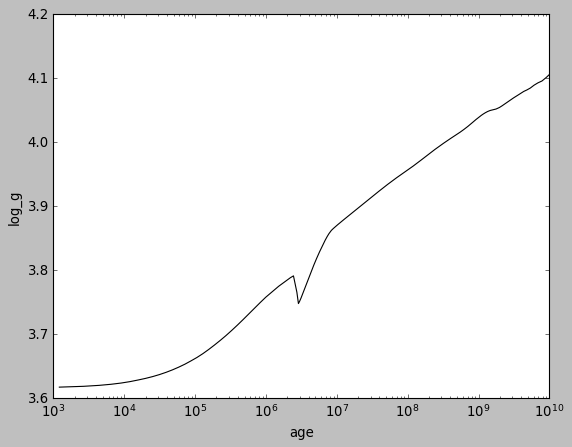

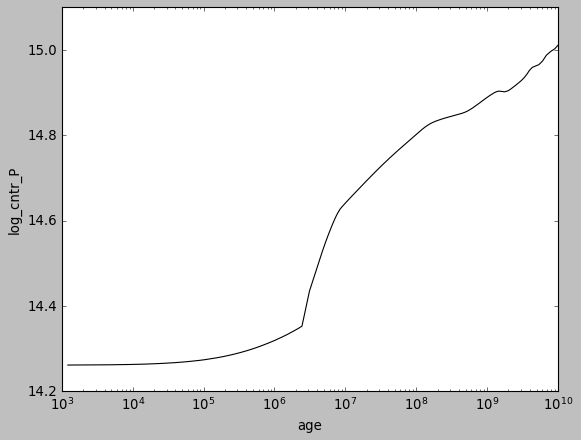

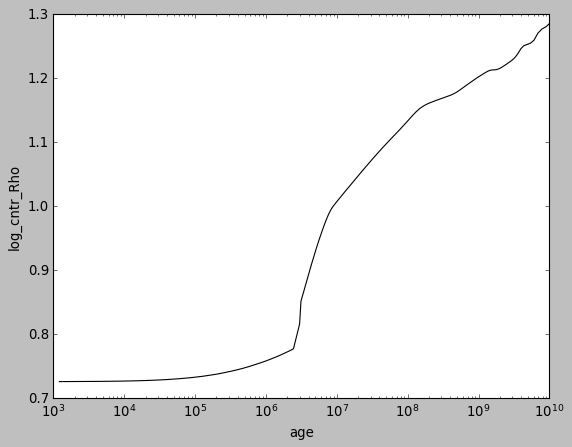

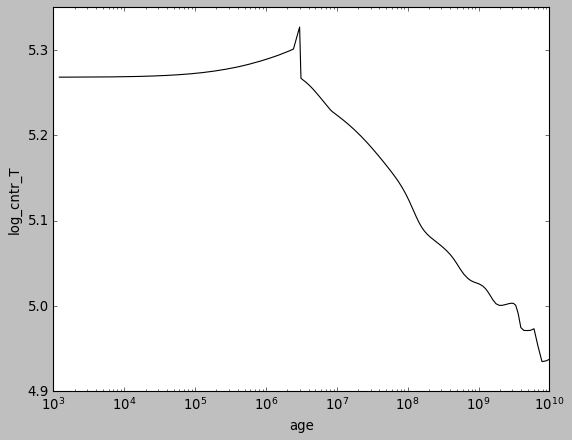

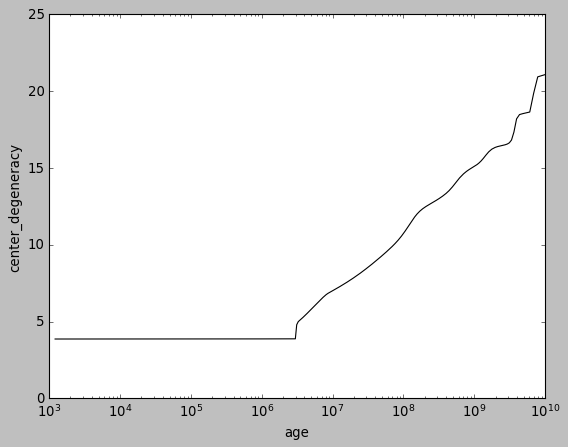

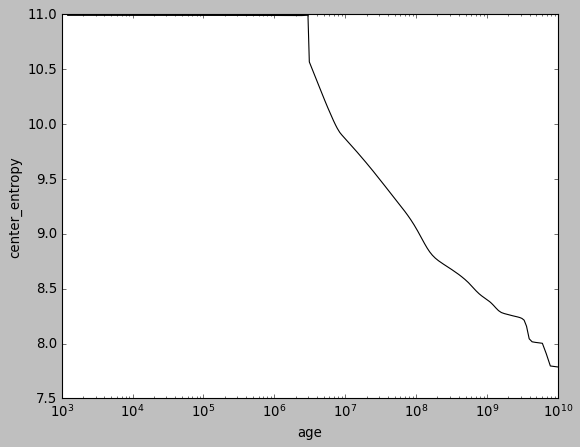

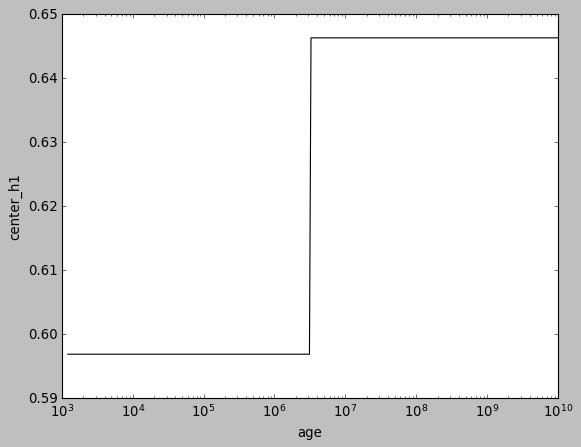

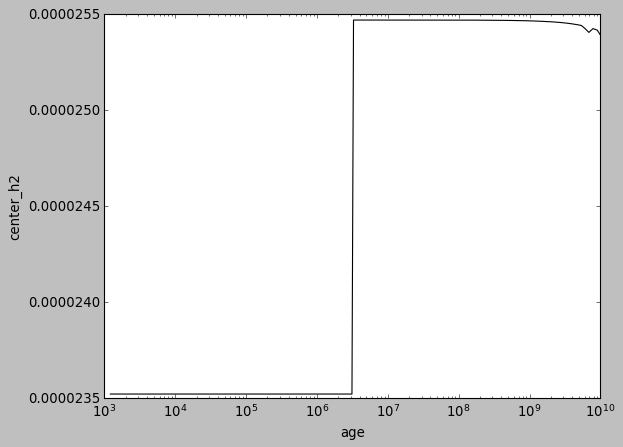

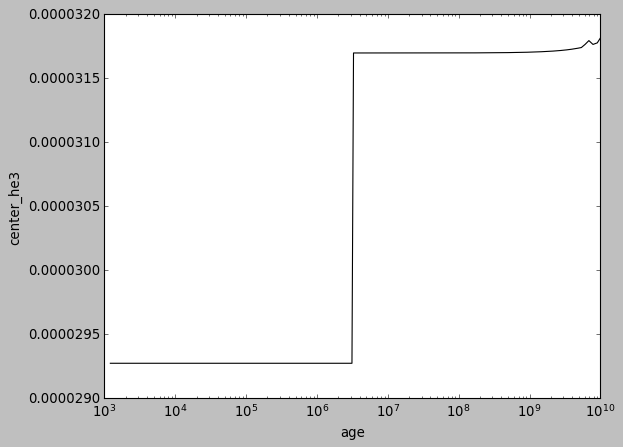

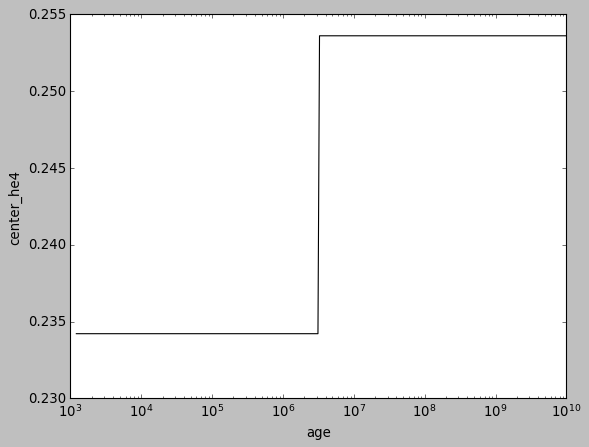

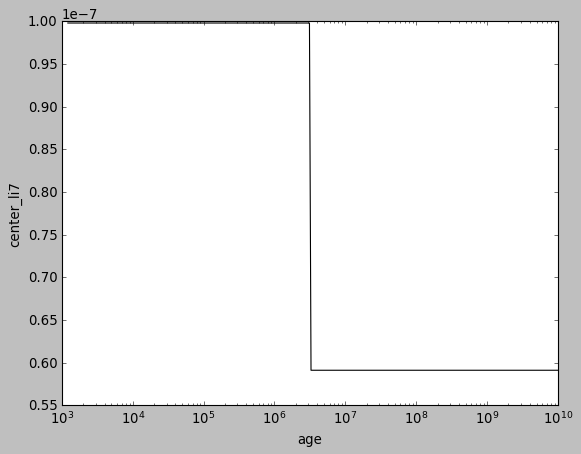

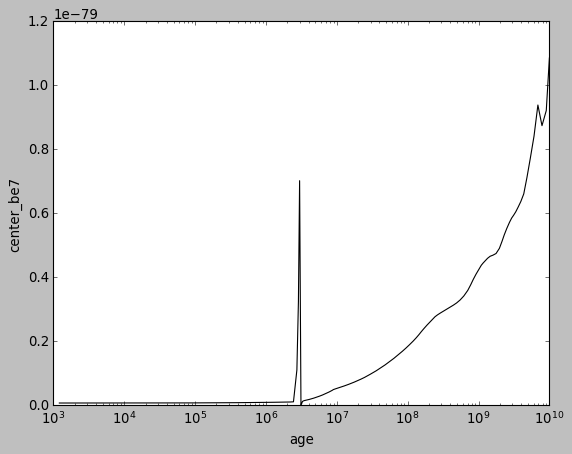

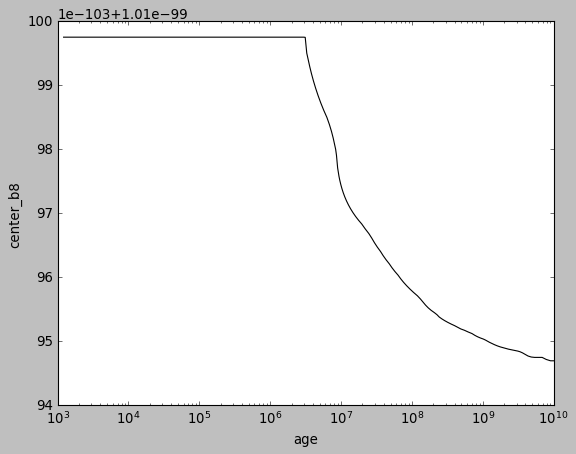

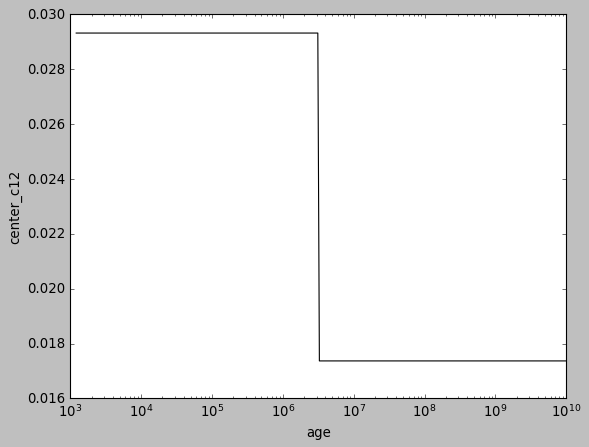

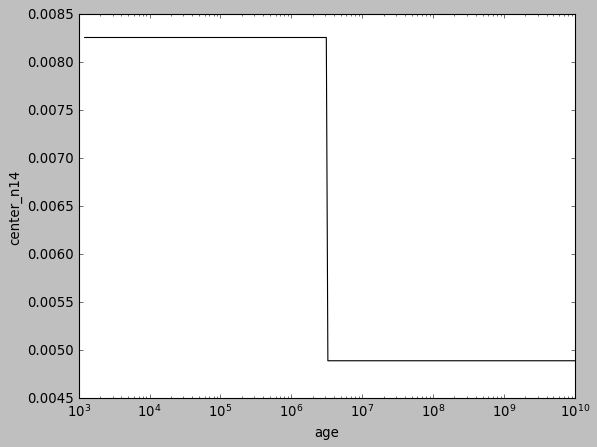

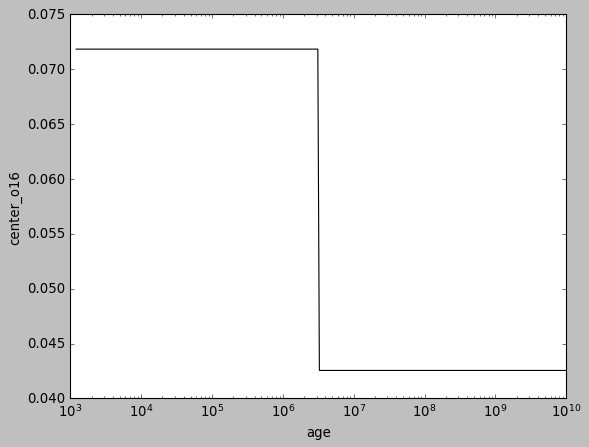

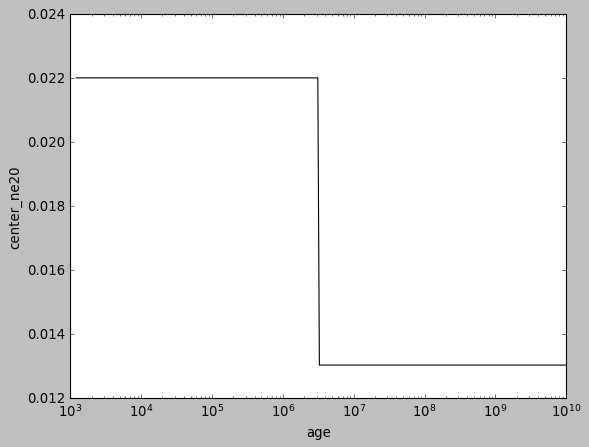

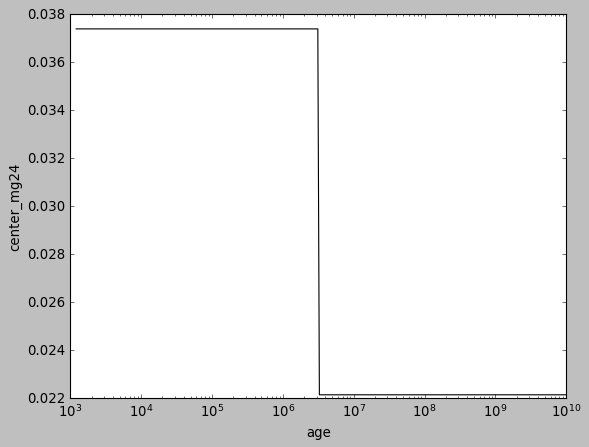

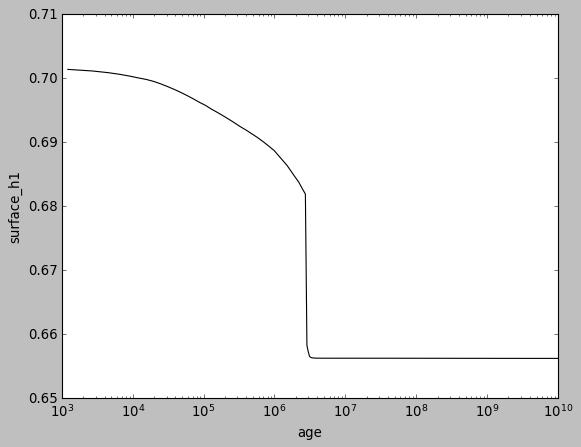

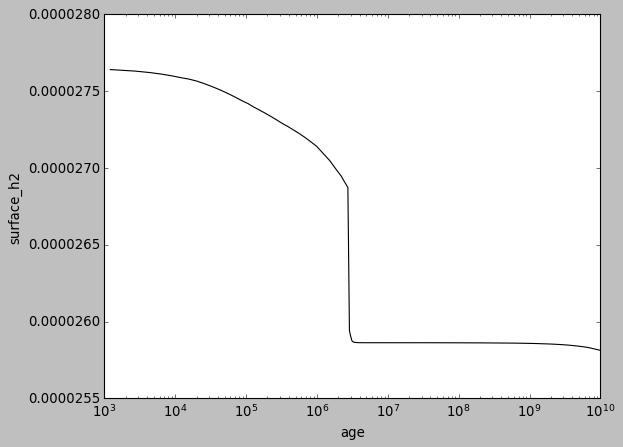

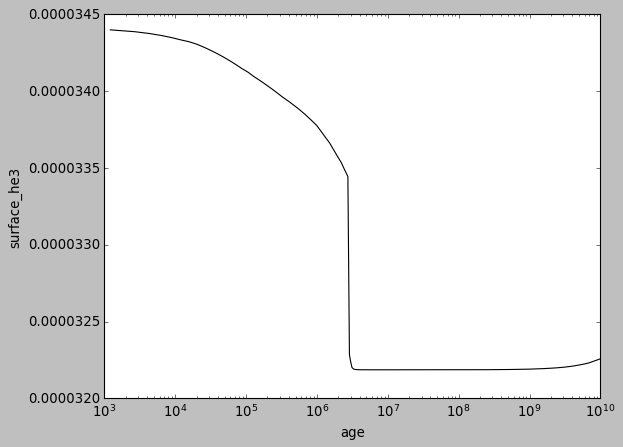

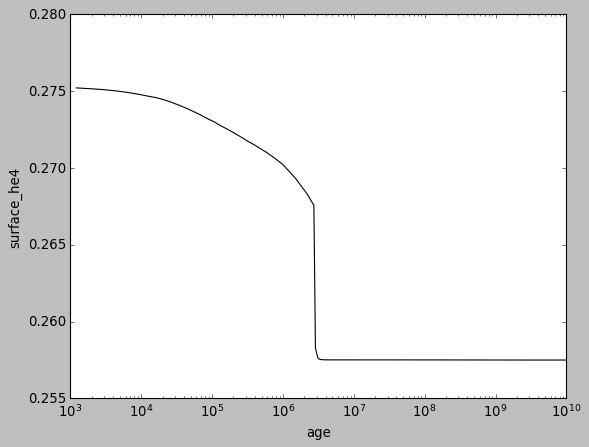

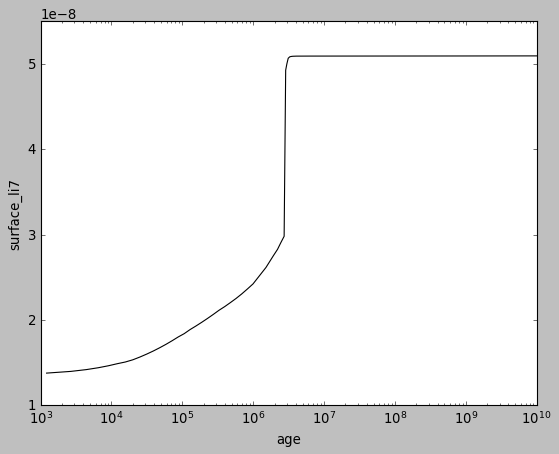

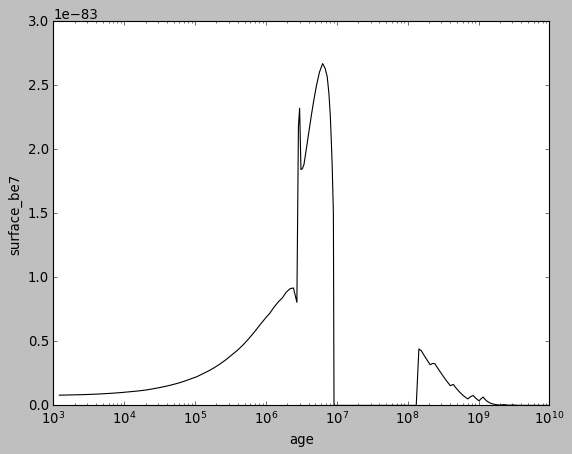

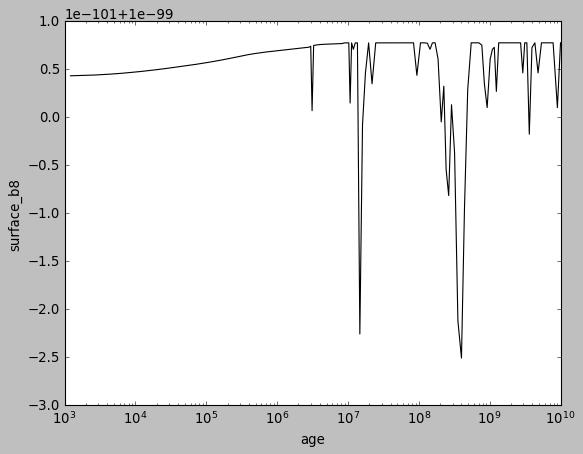

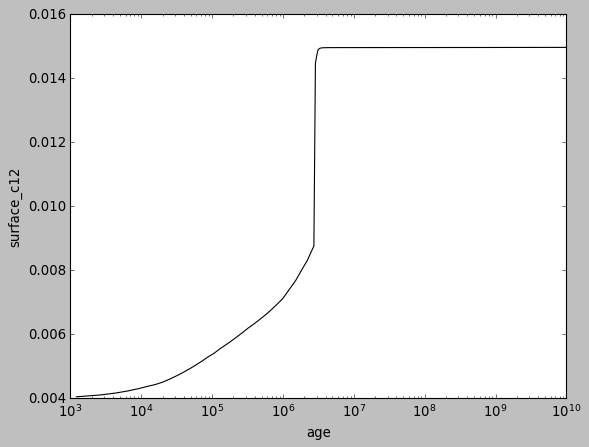

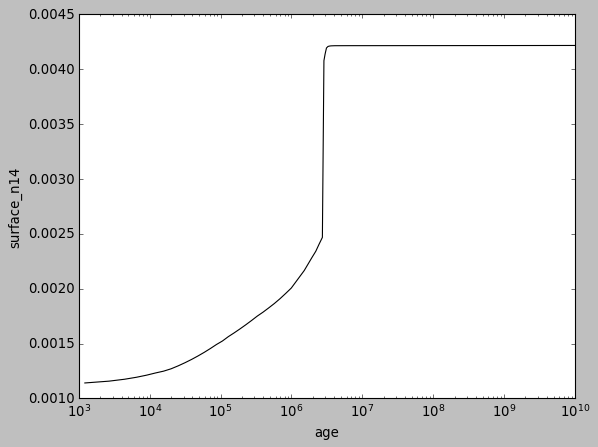

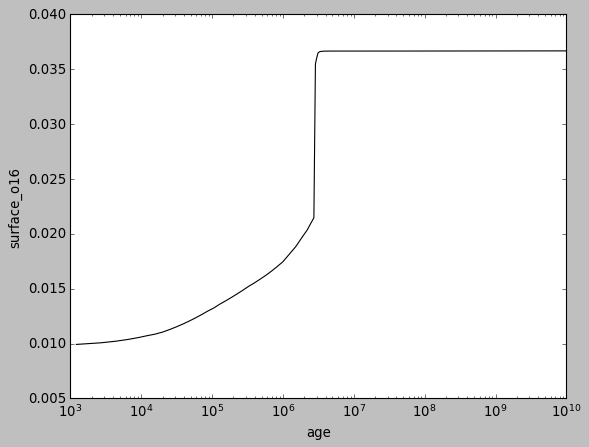

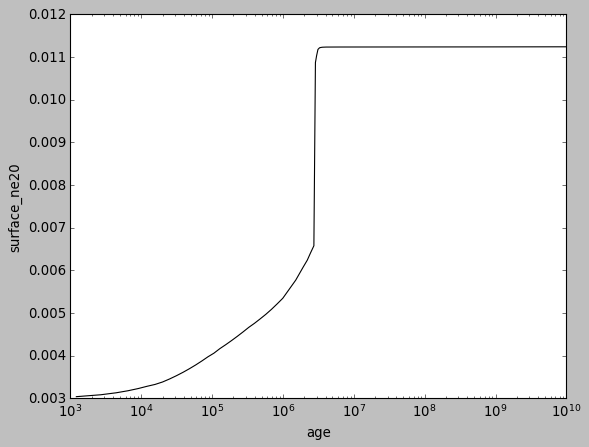

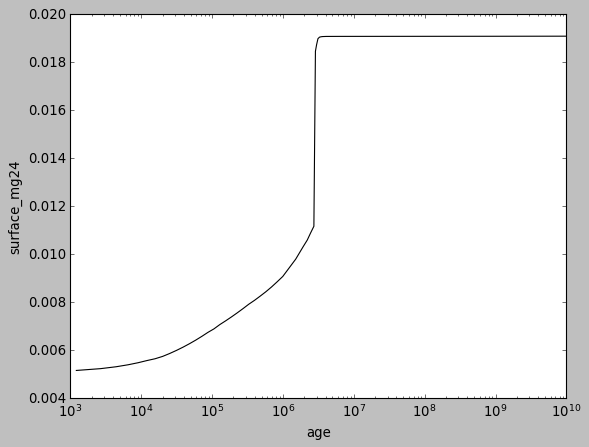

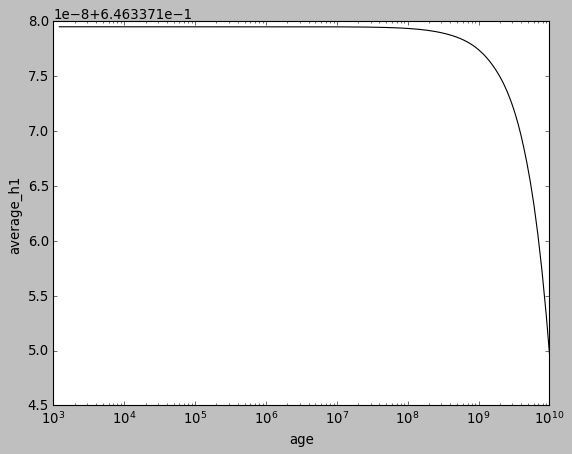

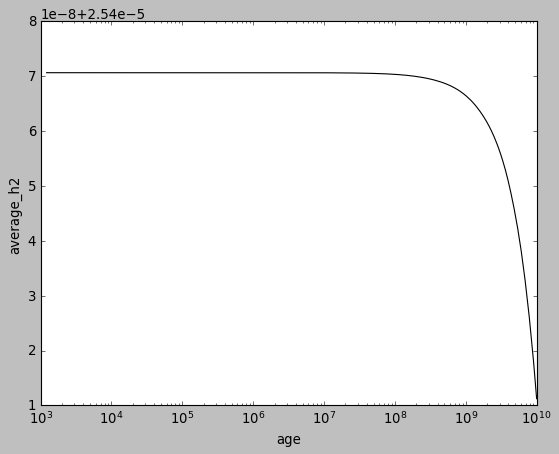

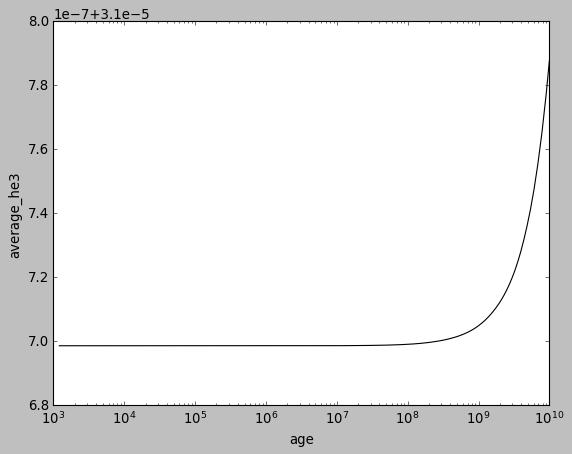

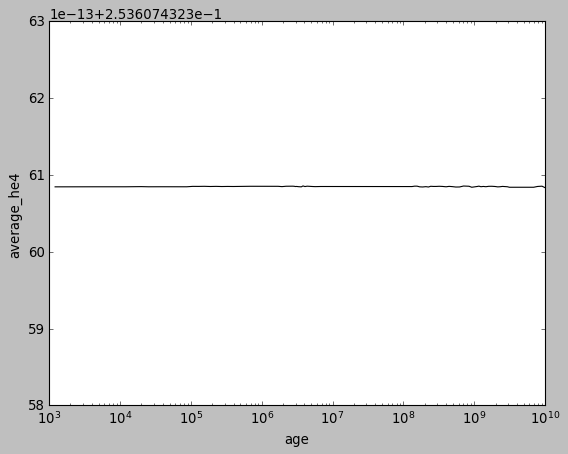

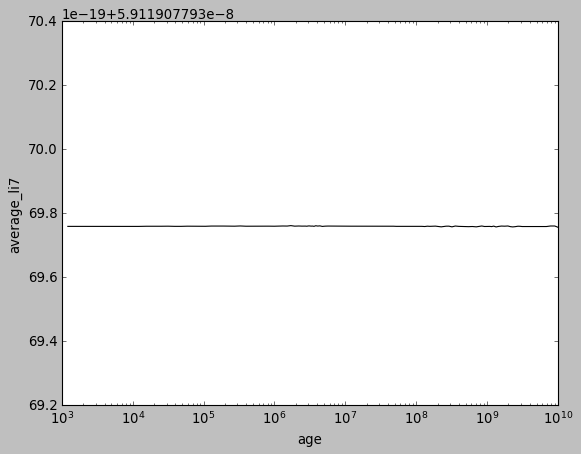

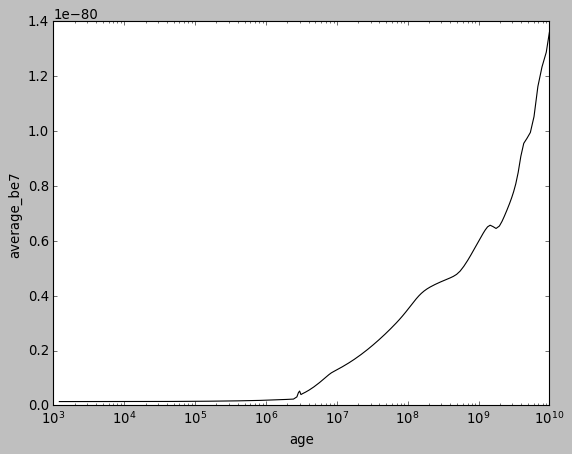

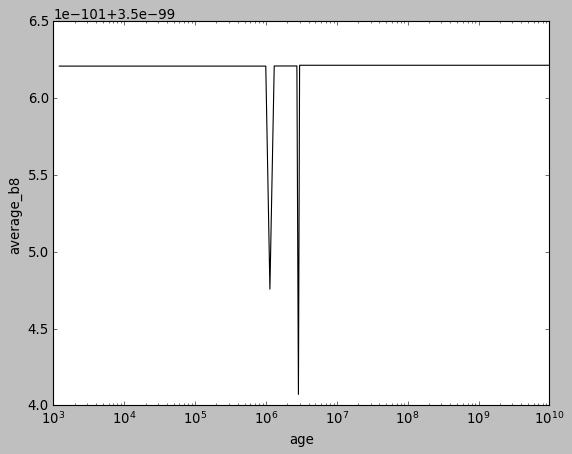

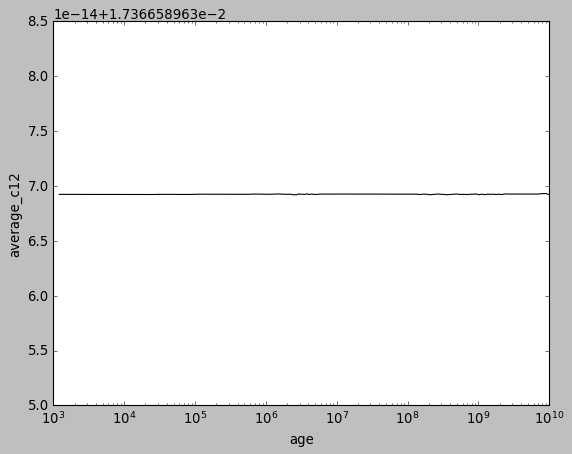

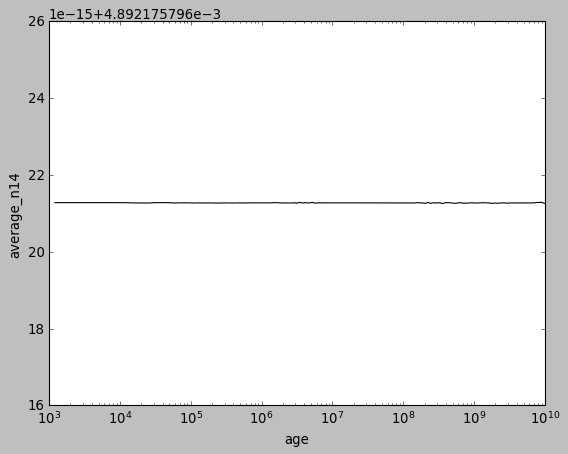

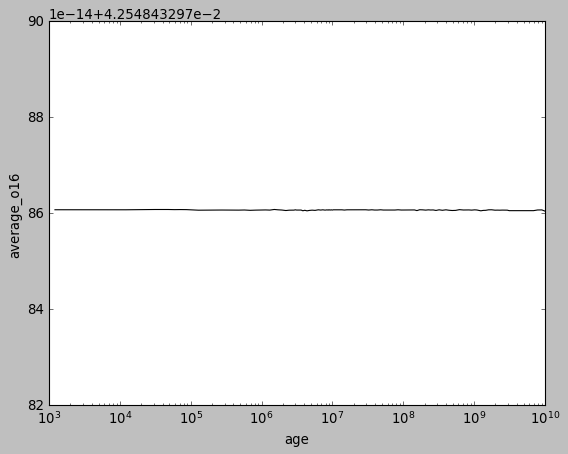

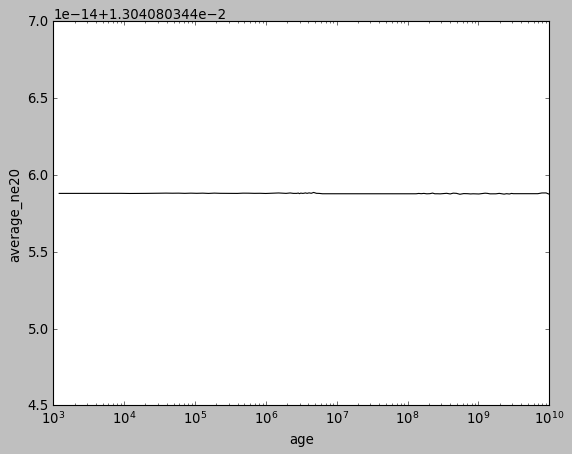

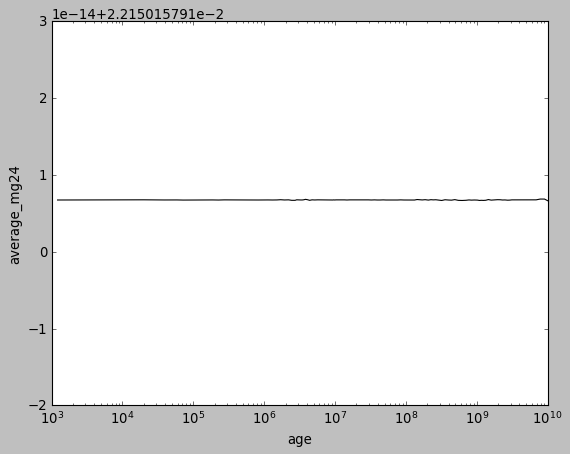

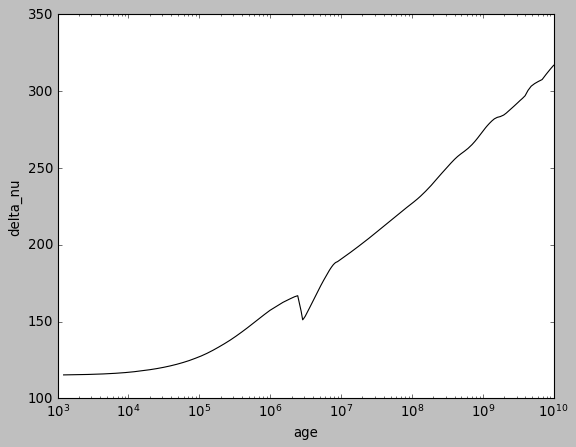

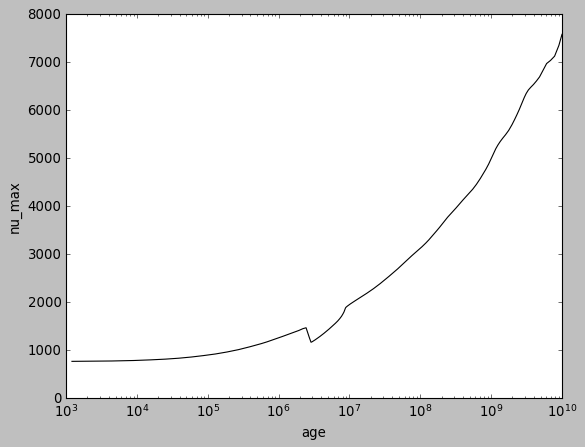

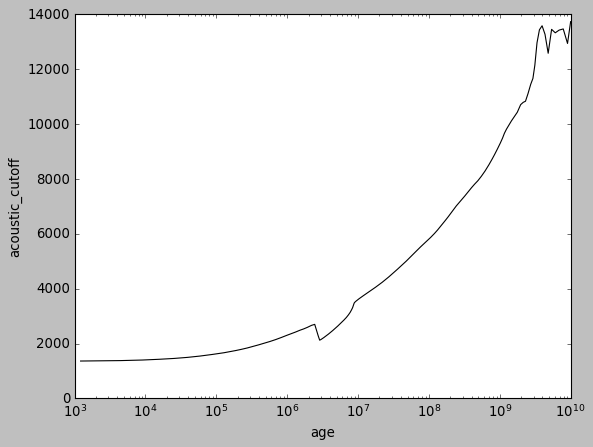

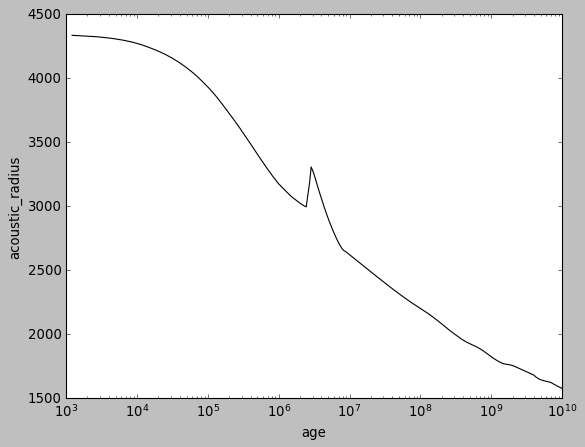

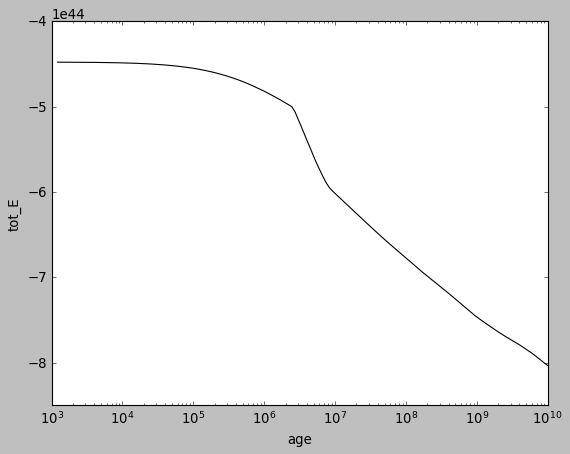

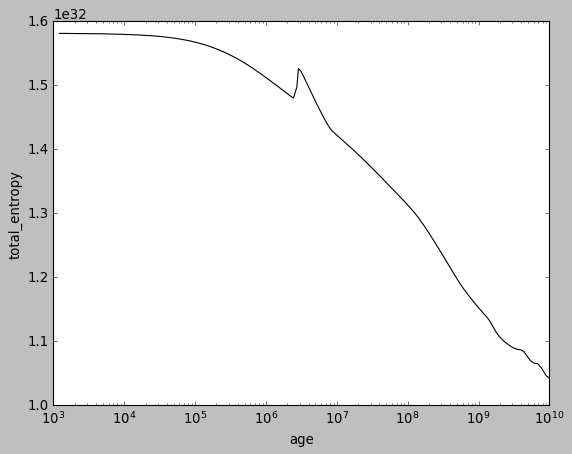

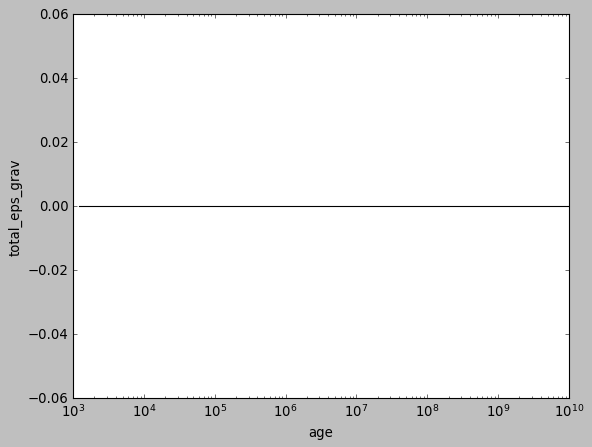

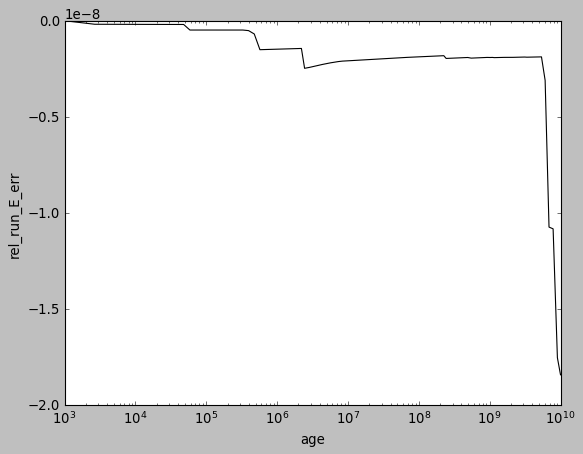

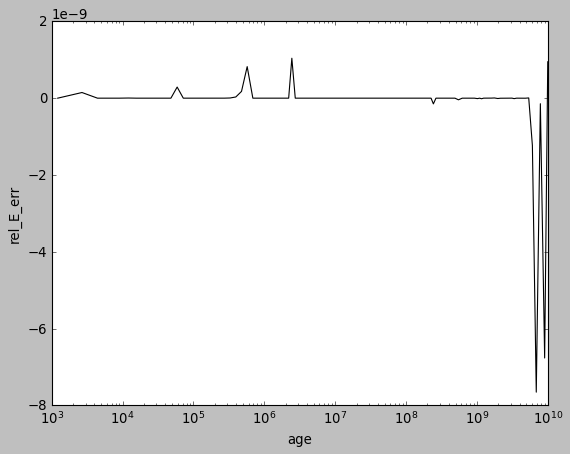

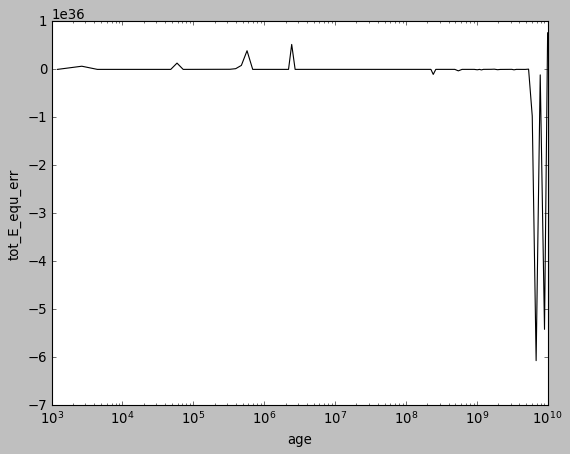

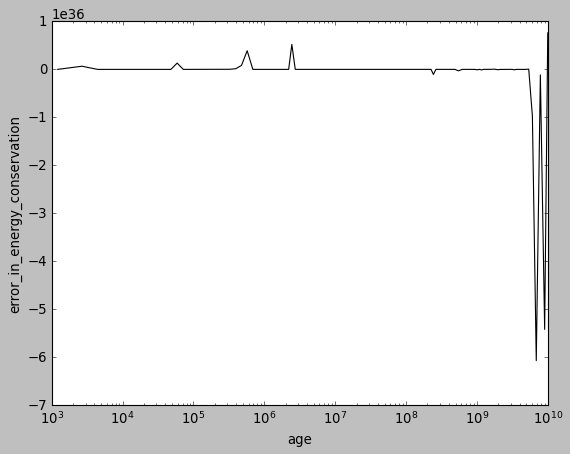

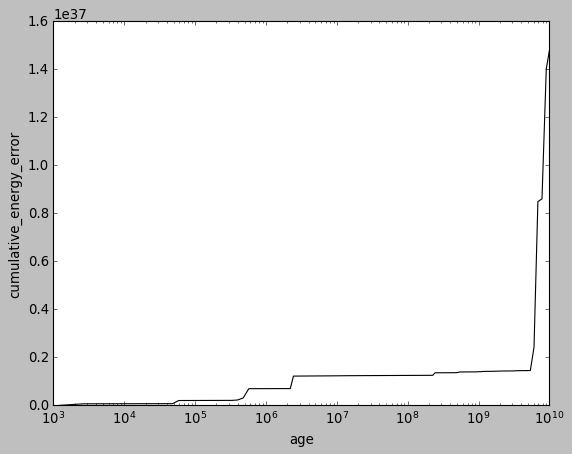

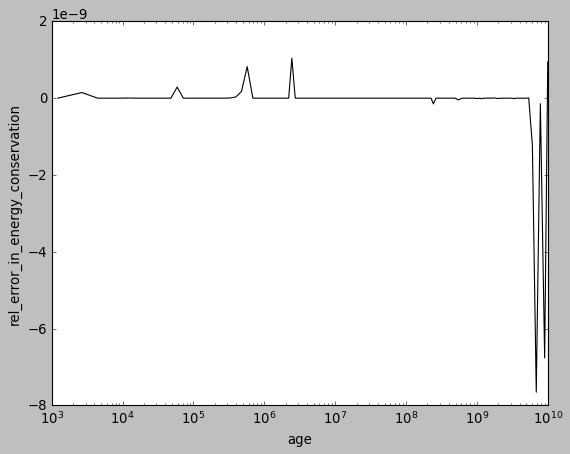

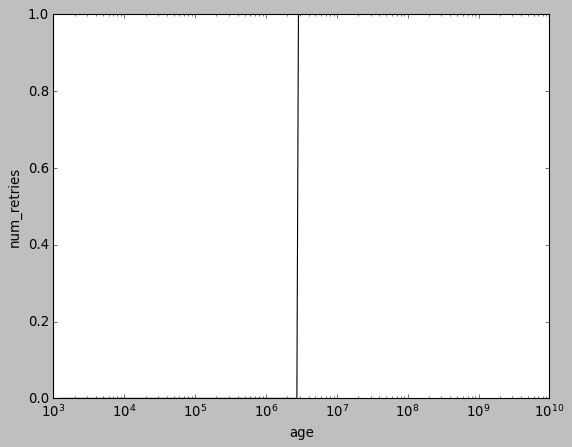

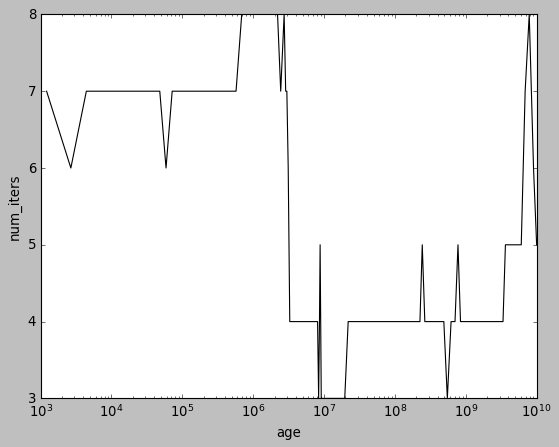

In [114]:
history_filename =  "{0}/{1}/planet_evolve_{2}_Mj_{3}_Rj_zbar={4}_{5}_s={6}_alpha={7}.history".format(evolve_models_dir, "linear_evolved", m, r, z, "linear", s, alpha)
history = Table.read(history_filename, format="ascii", header_start=4, data_start=5)

for col in history.colnames:
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.plot(history['star_age'], history[col], 'k-')
    ax.set_ylabel(col)
    ax.set_xlabel("age")
    ax.set_xscale("log")
    plt.show()
